In [1]:
from db.database import Database
from os import path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')
from db.models import Post, Topic, Blueprint
from lang_identification import identify_language
import tqdm

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
db = Database()
topics = db.get_topics()
posts = db.get_posts()
blueprints = db.get_all_blueprints()

Loading blueprints: 100%|██████████| 2228/2228 [00:01<00:00, 1383.44it/s]


Processing Blueprints: 100%|██████████| 2228/2228 [00:34<00:00, 64.35it/s]


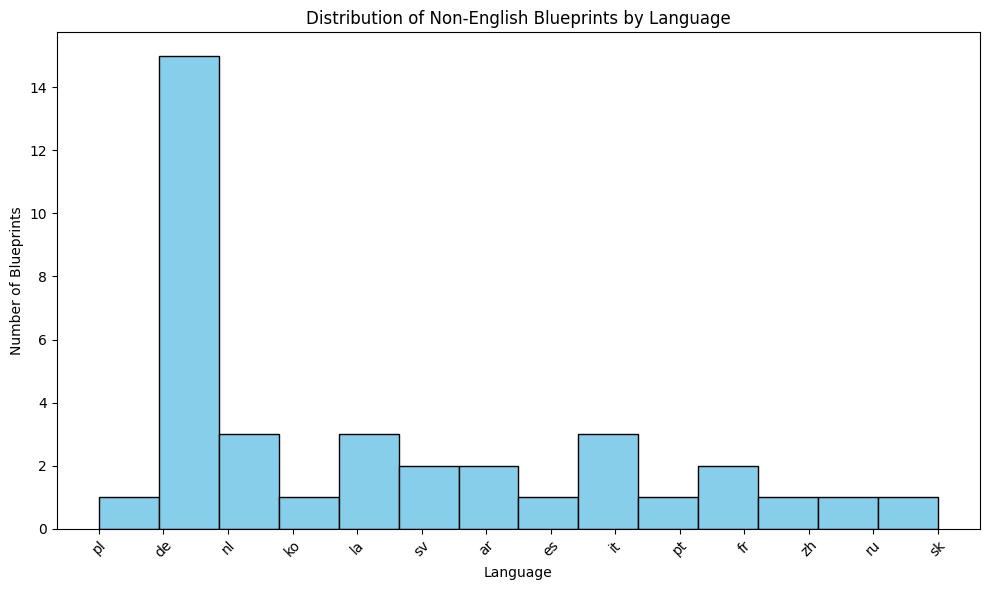

In [5]:

non_english = {} 
for bp in tqdm.tqdm(blueprints, desc="Processing Blueprints"):
    lang = identify_language(bp)
    if lang != 'en':
        non_english[bp] = lang

plt.figure(figsize=(10, 6))
plt.hist(non_english.values(), bins=len(set(non_english.values())), color='skyblue', edgecolor='black')
plt.title('Distribution of Non-English Blueprints by Language')
plt.xlabel('Language')
plt.ylabel('Number of Blueprints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
for bp in non_english:
    blueprints.remove(bp)

In [4]:
ex_topic = topics[59]
ex_topic_posts = db.get_posts_by_topic_id(ex_topic.id)
ex_topic_bps = [db.get_blueprints_by_post_id(post.post_id) for post in ex_topic_posts]
ex_topic_bps

[[<db.models.Blueprint at 0x24df88dd160>]]

In [5]:
ex_topic.topic_url

'https://community.home-assistant.io//t/mqtt-record-timestamp-of-event/274930'

In [7]:
groups = db.get_blueprints_per_topic()
groups.keys().__len__()

1211

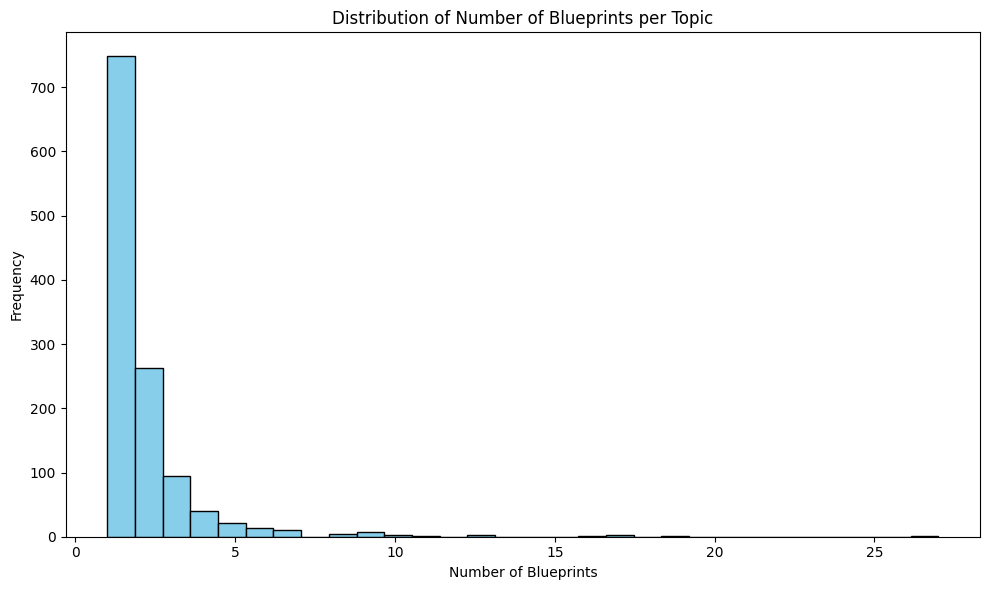

In [18]:
plt.figure(figsize=(10, 6))
plt.hist([len(bps) for bps in groups.values()], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Blueprints per Topic')
plt.xlabel('Number of Blueprints')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [31]:
real_groups = {k: v for k, v in groups.items() if len(v) > 1}
real_groups.values()

dict_values([[<db.models.Blueprint object at 0x000002C9E840C410>, <db.models.Blueprint object at 0x000002C9E840C440>], [<db.models.Blueprint object at 0x000002C9E840C5C0>, <db.models.Blueprint object at 0x000002C9E840C5F0>], [<db.models.Blueprint object at 0x000002C9E840C9B0>, <db.models.Blueprint object at 0x000002C9E840C9E0>, <db.models.Blueprint object at 0x000002C9E840CA10>], [<db.models.Blueprint object at 0x000002C9E840CA70>, <db.models.Blueprint object at 0x000002C9E840CAA0>], [<db.models.Blueprint object at 0x000002C9E840CCE0>, <db.models.Blueprint object at 0x000002C9E840CD10>], [<db.models.Blueprint object at 0x000002C9E840CD70>, <db.models.Blueprint object at 0x000002C9E840CDA0>], [<db.models.Blueprint object at 0x000002C9E840CE00>, <db.models.Blueprint object at 0x000002C9E840CE30>], [<db.models.Blueprint object at 0x000002C9E840CF50>, <db.models.Blueprint object at 0x000002C9E840CF80>], [<db.models.Blueprint object at 0x000002C9E840D040>, <db.models.Blueprint object at 0x0

In [ ]:
posts_dict = {post.post_id: post for post in posts}

{'1216159': <db.models.Post at 0x2c9dae18530>,
 '1216869': <db.models.Post at 0x2c9dae18590>,
 '1220860': <db.models.Post at 0x2c9dae185f0>,
 '1210255': <db.models.Post at 0x2c9dae18650>,
 '1220678': <db.models.Post at 0x2c9dae186b0>,
 '1220831': <db.models.Post at 0x2c9dae18710>,
 '1221547': <db.models.Post at 0x2c9dae18770>,
 '1222744': <db.models.Post at 0x2c9dae187d0>,
 '1222751': <db.models.Post at 0x2c9dae18830>,
 '1222809': <db.models.Post at 0x2c9dae18890>,
 '1223455': <db.models.Post at 0x2c9dae188f0>,
 '1223628': <db.models.Post at 0x2c9dae18950>,
 '1224871': <db.models.Post at 0x2c9dae189b0>,
 '1227831': <db.models.Post at 0x2c9dae18a10>,
 '1223792': <db.models.Post at 0x2c9dae18a70>,
 '1228473': <db.models.Post at 0x2c9dae18ad0>,
 '1222209': <db.models.Post at 0x2c9dae18b30>,
 '1222213': <db.models.Post at 0x2c9dae18b90>,
 '1226179': <db.models.Post at 0x2c9dae18bf0>,
 '1228975': <db.models.Post at 0x2c9dae18c50>,
 '1226466': <db.models.Post at 0x2c9dae18cb0>,
 '1227723': <

In [35]:
scores_dict = {}
for topic_id, bp_group in real_groups.items():
    _scores = []
    for bp in bp_group:
        _scores.append(posts_dict[bp.post_id].score)

    scores_dict[topic_id] = _scores
scores_dict

{'256469': [1518.8, 1518.8],
 '257765': [7765.8, 7765.8],
 '259767': [12325.4, 12325.4, 12325.4],
 '260727': [2332, 2332],
 '253977': [9875.6, 195.4],
 '265505': [2570.8, 2570.8],
 '255908': [2692.6, 39.8],
 '269117': [6099.8, 6099.8],
 '256311': [5532.6, 125, 29.4, 56],
 '257141': [2103.4, 52.2],
 '260744': [1265.2, 64.4],
 '286465': [487.4, 13],
 '305624': [1882.4, 1882.4],
 '294217': [6428, 6428],
 '280125': [15128.4, 544.2, 171.4],
 '286565': [1936.8, 55.2],
 '260725': [2739.4, 2739.4],
 '291907': [193.4, 193.4],
 '255773': [946, 946],
 '313571': [914.4, 914.4],
 '340021': [2495, 2495],
 '287064': [2744.4, 2744.4],
 '258591': [5644.8, 5644.8],
 '255456': [215.6, 98],
 '356870': [2878.6, 2878.6],
 '365041': [2542.4, 2542.4],
 '370741': [4991.8, 4991.8],
 '255878': [949.4, 117.6, 88.4, 31.6, 83.2, 83.2],
 '385439': [661.6, 661.6],
 '283973': [2497.4, 2497.4],
 '264183': [12109.4, 231.6],
 '274711': [25303.2, 105.8],
 '258743': [3716.8, 29.4],
 '257617': [12718.2, 33.2],
 '278447': [3